In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel("/home/jatin/ML & AI/Dataset/dataset-20200805T105332Z-001/dataset/Linear Regression.xlsx")

In [4]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [5]:
 data1 = data.drop(['bedrooms','bathrooms','floors'],axis=1)

In [6]:
data1

,price,sqft_living
0,221900,1180
1,538000,2570
2,180000,770
3,604000,1960
4,510000,1680
...,...,...
21608,360000,1530
21609,400000,2310
21610,402101,1020
21611,400000,1600


In [7]:
data1.isna().sum()

price          0
sqft_living    0
dtype: int64

#  Linear Regression-- sqft_living vs price 

In [8]:
data1.corr()

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


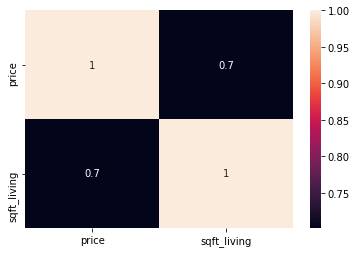

In [9]:
sns.heatmap(data1.corr(),annot=True)

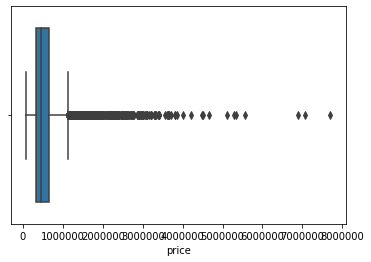

In [10]:
sns.boxplot(data1['price'])

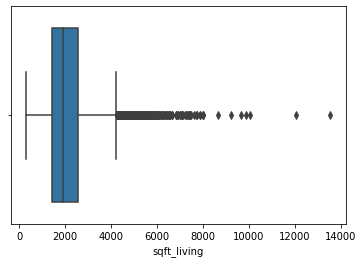

In [11]:
sns.boxplot(data1['sqft_living'])

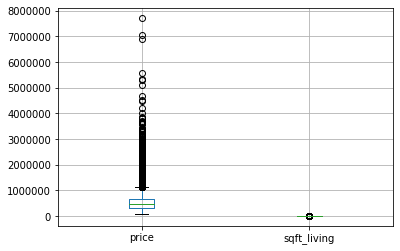

In [12]:
data1.boxplot()

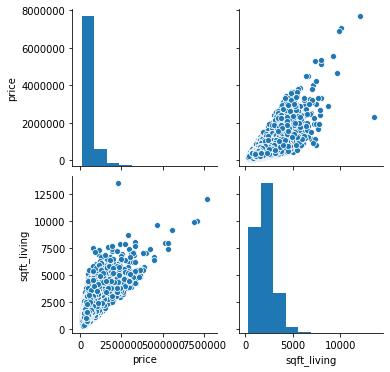

In [13]:
sns.pairplot(data1)

In [14]:
x = data1.iloc[:,1:]

In [15]:
y = data1.iloc[:,:1]

In [16]:
x

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680
...,...
21608,1530
21609,2310
21610,1020
21611,1600


In [17]:
y

,price
0,221900
1,538000
2,180000
3,604000
4,510000
...,...
21608,360000
21609,400000
21610,402101
21611,400000


Text(0.5, 1.0, 'Linear Regression')

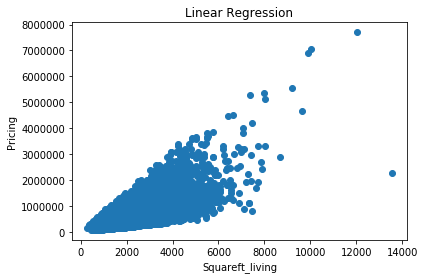

In [18]:
#Visualize Dataset
plt.scatter(x,y)
plt.xlabel('Squareft_living')
plt.ylabel('Pricing')
plt.title('Linear Regression')


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 4)

In [20]:
x_train.shape

(17290, 1)

In [21]:
x_test.shape

(4323, 1)

In [22]:
y_train.shape

(17290, 1)

In [23]:
y_test

,price
13248,311100
5309,535000
10962,271000
20976,705000
19957,840000
...,...
8527,610000
16521,187000
17198,305000
7539,809000


In [24]:
x_test

,sqft_living
13248,2130
5309,2210
10962,1800
20976,1580
19957,1680
...,...
8527,2640
16521,1730
17198,1490
7539,1840


In [25]:
data1.tail(30)

,price,sqft_living
21583,399950,710
21584,380000,1260
21585,270000,1870
21586,505000,1430
21587,385000,1520
21588,414500,1210
21589,347500,2540
21590,1222500,4910
21591,572000,2770
21592,475000,1190


In [26]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [27]:
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
lin_reg.coef_

array([[281.83375186]])

In [29]:
lin_reg.intercept_

array([-45850.76587235])

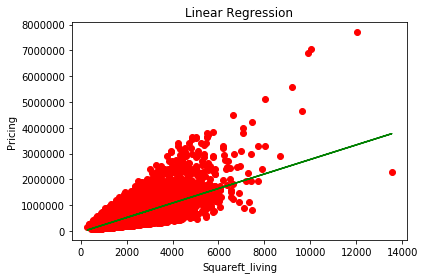

In [30]:
#training dataset
plt.scatter(x_train,y_train,color = 'red')
plt.plot(x_train,lin_reg.predict(x_train),color='green')
plt.xlabel('Squareft_living')
plt.ylabel('Pricing')
plt.title('Linear Regression')
plt.show()

In [31]:
y_pred = lin_reg.predict(x_test)
y_pred

array([[554455.1255973 ],
       [577001.8257464 ],
       [461449.98748229],
       ...,
       [374081.52440454],
       [472723.33755683],
       [546000.11304139]])

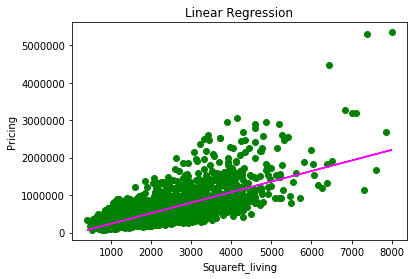

In [32]:
#testing data
plt.scatter(x_test,y_test,color = 'green')
plt.plot(x_test,lin_reg.predict(x_test),color='magenta')
plt.xlabel('Squareft_living')
plt.ylabel('Pricing')
plt.title('Linear Regression')
plt.show()

In [33]:
from sklearn.metrics import r2_score,mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
r2_square = r2_score(y_test,y_pred)

In [34]:
print("The root mean square error is::",RMSE)
print("The r_square value is::",r2_square)

The root mean square error is:: 258583.3025654093
The r_square value is:: 0.4830236050981105


In [35]:
unseen_pred = lin_reg.predict(np.array([[4470]]))
print("The unseen prediction is::",unseen_pred)

The unseen prediction is:: [[1213946.10495832]]


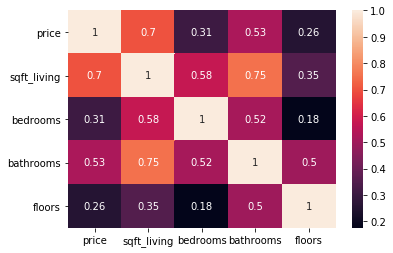

In [36]:
sns.heatmap(data.corr(),annot=True)

In [37]:
data

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0
...,...,...,...,...,...
21608,360000,1530,3,2.50,3.0
21609,400000,2310,4,2.50,2.0
21610,402101,1020,2,0.75,2.0
21611,400000,1600,3,2.50,2.0


# Linear Regression-- bedrooms vs price 

In [38]:
data2 = data[['bedrooms','price']]

In [39]:
data2

,bedrooms,price
0,3,221900
1,3,538000
2,2,180000
3,4,604000
4,3,510000
...,...,...
21608,3,360000
21609,4,400000
21610,2,402101
21611,3,400000


In [42]:
x = data2.iloc[:,:1]
x

,bedrooms
0,3
1,3
2,2
3,4
4,3
...,...
21608,3
21609,4
21610,2
21611,3


In [44]:
y = data2.iloc[:,1:]
y

,price
0,221900
1,538000
2,180000
3,604000
4,510000
...,...
21608,360000
21609,400000
21610,402101
21611,400000


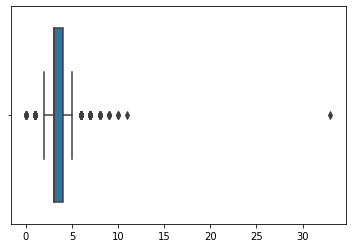

In [45]:
sns.boxplot(x)

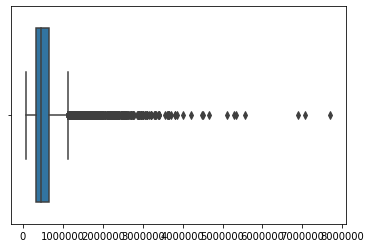

In [46]:
sns.boxplot(y)

In [48]:
x.bedrooms.max()

33

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

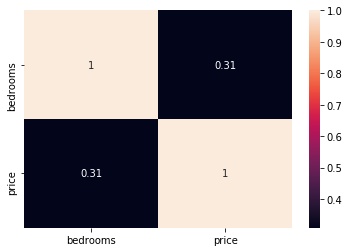

In [52]:
sns.heatmap(data2.corr(),annot=True)

In [53]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

In [54]:
lin_reg.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
lin_reg.coef_

array([[118660.62797868]])

In [56]:
lin_reg.intercept_

array([139952.87593386])

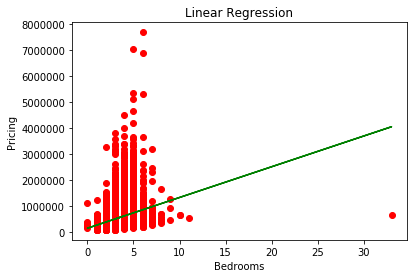

In [57]:
#training dataset
plt.scatter(xtrain,ytrain,color = 'red')
plt.plot(xtrain,lin_reg.predict(xtrain),color='green')
plt.xlabel('Bedrooms')
plt.ylabel('Pricing')
plt.title('Linear Regression')
plt.show()

In [58]:
ypred = lin_reg.predict(x_test)
ypred

array([[2.52887090e+08],
       [2.62379941e+08],
       [2.13729083e+08],
       ...,
       [1.76944289e+08],
       [2.18475508e+08],
       [2.49327272e+08]])

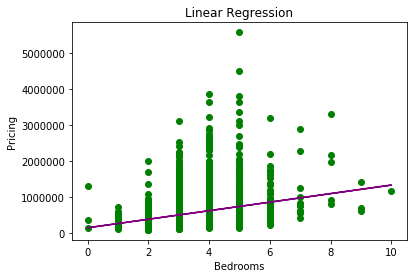

In [59]:
#testing data
plt.scatter(xtest,ytest,color = 'green')
plt.plot(xtest,lin_reg.predict(xtest),color='purple')
plt.xlabel('Bedrooms')
plt.ylabel('Pricing')
plt.title('Linear Regression')
plt.show()

In [61]:
from sklearn.metrics import r2_score,mean_squared_error
RMSE = np.sqrt(mean_squared_error(ytest,ypred))
r2_square = r2_score(ytest,ypred)

In [62]:
print("The root mean square error is::",RMSE)
print("The r_square value is::",r2_square)

The root mean square error is:: 269765105.22352934
The r_square value is:: -521266.4874061257


In [63]:
ytest

,price
6638,735000
7366,1150000
3158,350500
9117,860000
3392,122000
...,...
8494,338000
5359,263000
5242,397450
13777,375000


In [64]:
xtest

,bedrooms
6638,4
7366,3
3158,2
9117,5
3392,2
...,...
8494,4
5359,3
5242,4
13777,2


In [65]:
unseen_pred = lin_reg.predict(np.array([[4]]))
print("The unseen prediction is::",unseen_pred)

The unseen prediction is:: [[614595.3878486]]


# Linear Regression-- bathrooms vs price 

In [66]:
data

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0
...,...,...,...,...,...
21608,360000,1530,3,2.50,3.0
21609,400000,2310,4,2.50,2.0
21610,402101,1020,2,0.75,2.0
21611,400000,1600,3,2.50,2.0


In [70]:
data3 = data[['bathrooms','sqft_living']]
data3

,bathrooms,sqft_living
0,1.00,1180
1,2.25,2570
2,1.00,770
3,3.00,1960
4,2.00,1680
...,...,...
21608,2.50,1530
21609,2.50,2310
21610,0.75,1020
21611,2.50,1600


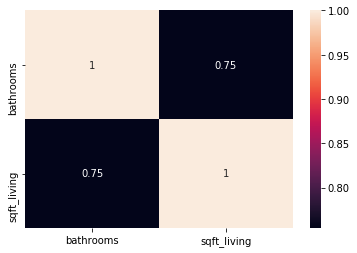

In [71]:
sns.heatmap(data3.corr(),annot=True)

In [72]:
x = data3.iloc[:,:1]
x

,bathrooms
0,1.00
1,2.25
2,1.00
3,3.00
4,2.00
...,...
21608,2.50
21609,2.50
21610,0.75
21611,2.50


In [74]:
y = data3.iloc[:,1:]
y

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680
...,...
21608,1530
21609,2310
21610,1020
21611,1600


In [75]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.2,random_state=2)

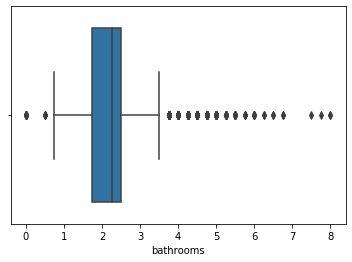

In [77]:
sns.boxplot(data3['bathrooms'])

In [78]:
lin_reg.fit(Xtrain,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
lin_reg.coef_

array([[894.52266791]])

In [80]:
lin_reg.intercept_

array([183.7579508])

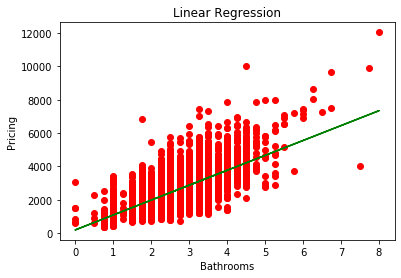

In [81]:
#training dataset
plt.scatter(Xtrain,Ytrain,color = 'red')
plt.plot(Xtrain,lin_reg.predict(Xtrain),color='green')
plt.xlabel('Bathrooms')
plt.ylabel('Pricing')
plt.title('Linear Regression')
plt.show()

In [83]:
Ypred = lin_reg.predict(Xtest)
Ypred

array([[2196.43395359],
       [1525.54195266],
       [1078.28061871],
       ...,
       [2420.06462057],
       [1078.28061871],
       [2643.69528755]])

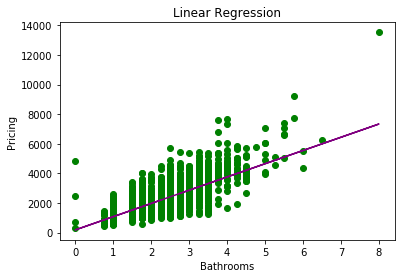

In [86]:
#testing dataset
plt.scatter(Xtest,Ytest,color = 'green')
plt.plot(Xtest,lin_reg.predict(Xtest),color='purple')
plt.xlabel('Bathrooms')
plt.ylabel('Pricing')
plt.title('Linear Regression')
plt.show()

In [87]:
RMSE = np.sqrt(mean_squared_error(Ytest,Ypred))
r2_square = r2_score(Ytest,Ypred)
print("The root mean square error is::",RMSE)
print("The r_square value is::",r2_square)

The root mean square error is:: 617.1384386351833
The r_square value is:: 0.5732535855358019


In [88]:
Xtest

,bathrooms
6638,2.25
7366,1.50
3158,1.00
9117,3.25
3392,1.00
...,...
8494,1.75
5359,1.75
5242,2.50
13777,1.00


In [89]:
Ytest

,sqft_living
6638,2410
7366,2170
3158,1450
9117,4500
3392,860
...,...
8494,1530
5359,1580
5242,2650
13777,820


In [91]:
unseen_pred = lin_reg.predict(np.array([[1.75]]))
print("The unseen value is...",unseen_pred)

The unseen value is... [[1749.17261964]]


#  Linear Regression-- floors vs price 

In [92]:
data4 = data[['floors','sqft_living']]

In [93]:
data4

,floors,sqft_living
0,1.0,1180
1,2.0,2570
2,1.0,770
3,1.0,1960
4,1.0,1680
...,...,...
21608,3.0,1530
21609,2.0,2310
21610,2.0,1020
21611,2.0,1600


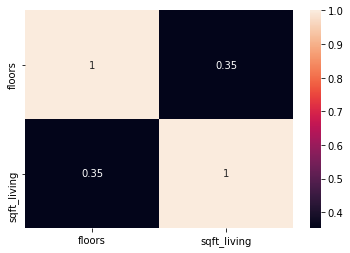

In [94]:
sns.heatmap(data4.corr(),annot=True)

In [95]:
x = data4.iloc[:,:1]
x

,floors
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0
...,...
21608,3.0
21609,2.0
21610,2.0
21611,2.0


In [96]:
y = data4.iloc[:,1:]
y

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680
...,...
21608,1530
21609,2310
21610,1020
21611,1600


In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.2,random_state=2)

In [103]:
X_test.shape

(4323, 1)

In [99]:
lin_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
lin_reg.coef_

array([[594.13325362]])

In [101]:
lin_reg.intercept_

array([1185.64520874])

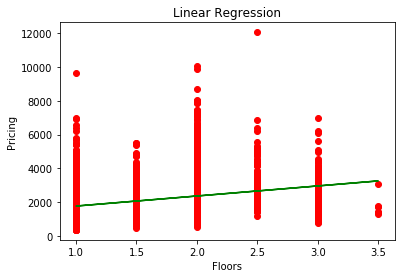

In [102]:
#training dataset
plt.scatter(X_train,Y_train,color = 'red')
plt.plot(X_train,lin_reg.predict(X_train),color='green')
plt.xlabel('Floors')
plt.ylabel('Pricing')
plt.title('Linear Regression')
plt.show()

In [104]:
Y_pred = lin_reg.predict(X_test)
Y_pred

array([[2076.84508918],
       [1779.77846237],
       [1779.77846237],
       ...,
       [2373.91171599],
       [1779.77846237],
       [2076.84508918]])

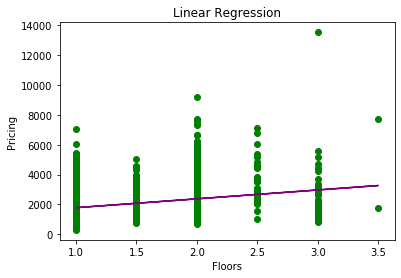

In [105]:
#testing dataset
plt.scatter(X_test,Y_test,color = 'green')
plt.plot(X_test,lin_reg.predict(X_test),color='purple')
plt.xlabel('Floors')
plt.ylabel('Pricing')
plt.title('Linear Regression')
plt.show()

In [106]:
RMSE = np.sqrt(mean_squared_error(Y_test,Y_pred))
r2_square = r2_score(Y_test,Y_pred)
print("The root mean square error is::",RMSE)
print("The r_square value is::",r2_square)

The root mean square error is:: 880.8798655308933
The r_square value is:: 0.13056313113428442


In [107]:
X_test

,floors
6638,1.5
7366,1.0
3158,1.0
9117,2.0
3392,1.0
...,...
8494,1.0
5359,1.0
5242,2.0
13777,1.0


In [108]:
Y_test

,sqft_living
6638,2410
7366,2170
3158,1450
9117,4500
3392,860
...,...
8494,1530
5359,1580
5242,2650
13777,820


In [111]:
unseen_pred = lin_reg.predict(np.array([[2.0]]))
print("The unseen value is...",unseen_pred)

The unseen value is... [[2373.91171599]]
